In [2]:
#CONDA ENV base (python 3.9.12)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from Bio import SeqIO
import pyranges as pr


#Import your modules
#---------------------------------------
import te_rna_f as ter
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Calculate evolutionary age of TEs

In [ ]:
#Compute evolutionary age
ev_df = te.read_rmsk('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/hg38.fa.out')


In [108]:
ev_df

,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repStart,repEnd,repLeft,id,repClass,repFamily,length,age
0,463,13.0,6.0,17.0,chr1,10001,10468,248945954,+,(TAACCC)n,1,471,0,1,Simple_repeat,None,470,0.013114
1,3612,114.0,215.0,13.0,chr1,10469,11447,248944975,-,TAR1,399,1712,483,2,Satellite,telo,1229,0.123656
2,484,251.0,132.0,0.0,chr1,11505,11675,248944747,-,L1MC5a,2382,395,199,3,LINE,L1,196,0.305600
3,239,294.0,19.0,10.0,chr1,11678,11780,248944642,-,MER5B,74,104,1,4,DNA,hAT-Charlie,103,0.373185
4,318,230.0,37.0,0.0,chr1,15265,15355,248941067,-,MIR3,119,143,49,5,SINE,MIR,94,0.274683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520113,744,38.0,11.0,25.0,chrY,57216407,57217320,10095,+,(TTAGGG)n,1,924,0,4607726,Simple_repeat,None,923,0.038996
5520114,55,105.0,43.0,0.0,chrY,57217321,57217413,10002,+,(GT)n,1,97,0,4607727,Simple_repeat,None,96,0.113117
5520115,2240,119.0,0.0,10.0,chrY_KI270740v1_random,229,540,36700,-,AluY,0,311,3,4607728,SINE,Alu,308,0.129576
5520116,1433,141.0,40.0,4.0,chrY_KI270740v1_random,625,867,36373,-,L1PA7,2,6152,5901,4607729,LINE,L1,251,0.156191


In [202]:
#Subset LINEs/SINEs - order by evolutionary age
l_unq = line['gene_id'].unique()
s_unq = sine['gene_id'].unique()
ev_dict = {'family':[], 'element':[], 'age':[]} #empty dict

In [203]:
for l in l_unq:
    curr_df = ev_df[ev_df['repName'] == l]
    ev_dict['family'].append('LINE')
    ev_dict['element'].append(l)
    ev_dict['age'].append(np.mean(curr_df['age'].values))

In [204]:
for l in s_unq:
    curr_df = ev_df[ev_df['repName'] == l]
    ev_dict['family'].append('SINE')
    ev_dict['element'].append(l)
    ev_dict['age'].append(np.mean(curr_df['age'].values))


In [206]:
ev_df_s = pd.DataFrame(ev_dict)
#save dataframe to csv
ev_df_s.to_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv', index=False)

# Filter for TSO



### Calculate TSS dispersion after TSO filtering


In [3]:
tss = pr.read_bed('/cndd3/dburrows/DATA/te/gtf/annotations/refTSS/refTSS_v3.3_human_coordinate.hg38.bed')

In [4]:
tss

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB
0,chr1,36521,36538,hg_234905.1,1,+,36529,36530,"255,255,0"
1,chr1,207042,207057,hg_233845.1,1,+,207049,207050,"255,255,0"
2,chr1,629191,629220,hg_1.1,1,+,629205,629206,"255,255,0"
3,chr1,629259,629269,hg_2.1,1,+,629264,629265,"255,255,0"
4,chr1,629635,629651,hg_235997.1,1,+,629643,629644,"255,255,0"
...,...,...,...,...,...,...,...,...,...
224689,chrY,24776485,24776499,hg_244143.1,1,-,24776492,24776493,"255,255,0"
224690,chrY,24813392,24813393,hg_244144.1,1,-,24813392,24813393,"255,255,0"
224691,chrY,25051999,25052000,hg_244147.1,1,-,25051999,25052000,"255,255,0"
224692,chrY,26671129,26671136,hg_201298.1,1,-,26671132,26671133,"255,255,0"


In [124]:
import glob
glob.glob('/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU' + '/*Tra*.bam')[0]

'/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU/Aligned.toTranscriptome.out.bam'

In [114]:
glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*trim.*.gz')

['/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1241-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1277-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6032-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5643-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subse

### Calculate positions of TSO

In [36]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'])

In [37]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(str.split(prac[0])).astype(int)
    return(v)


In [38]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


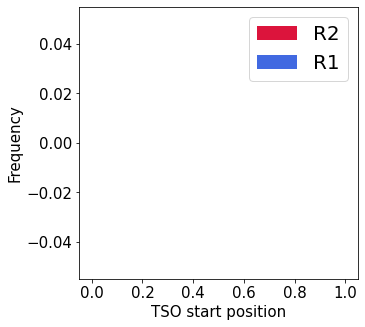

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [49]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R2*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R2-trim-pos.txt'])

In [40]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(prac).astype(int)
    return(v)


In [50]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [55]:
R1_cat, R2_cat

(array([100.,  11.,  38., ..., 100.,   0.,  47.]),
 array([ 75., 100., 100., ...,  78., 100., 100.]))

In [48]:
np.max(R1_cat)

100.0

In [60]:
R1_filt = 100 - R1_cat[R1_cat < R2_cat]
R2_filt = 100 - R2_cat[R2_cat < R1_cat]


In [56]:
R1_filt = 100 - R1_cat
R2_filt = 100 - R2_cat


In [59]:
R1_filt

array([  0.,  89.,  62., ...,   0., 100.,  53.])

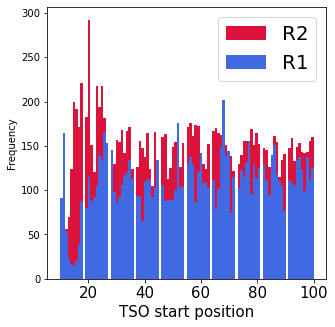

In [61]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
#plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_filt = 100 - R1_cat[R1_cat < 100]
R2_filt = 100 - R2_cat[R2_cat < 100]

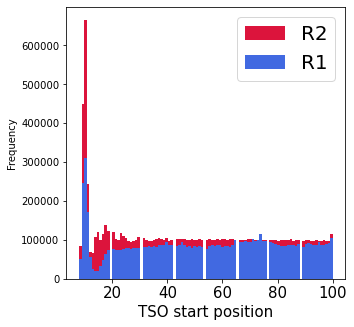

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [ ]:
line_unq = np.unique(line['gene_id'])
ev_line = ev_df[ev_df['repClass']=='LINE']
ev_line


### Calculate proportions of TSO

In [ ]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/fastq.subset.TSO/TSO_counts.csv')


In [ ]:
df

,ID,counts,total reads,normalised counts
0,6032-GLU,5393484,461783892,0
1,6032-GABA,4086032,342269132,0
2,6285-GLU,6126792,502425144,0
3,6285-GABA,7227780,613945456,0
4,1823-GLU,0,302078012,0
5,1823-GABA,4499944,406219576,0
6,5643-GLU,3905756,344266196,0
7,5643-GABA,5161144,445277700,0
8,HCK16HECA028-GLU,4857624,397996640,0
9,HCK16HECA028-GABA,4850800,407171776,0


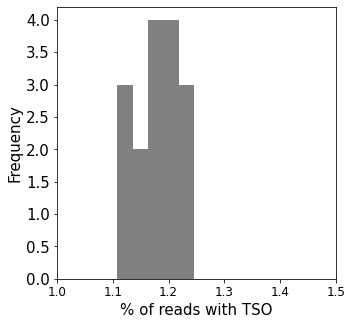

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
data = np.asarray(df['counts']/df[' total reads']) 
data[data>0]
plt.hist(data[data>0]*100, bins=5, color='grey')
plt.xlabel('% of reads with TSO', fontsize=15)
plt.xlim(1,1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig(s_fig + '/TSO_freq.svg', transparent=True)
plt.show()



In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# putatively Active Transposable Element Mapping (ATEM)

### Generate full length, promoter containing TE bed file 
* remove truncated insertions
* remove insertions lacking the 5' promoter

In [3]:
# Load in data
#rmsk file
# rmsk_old = pr.read_gtf('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf', as_df=True)

filename = '/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/hg38.fa.out'
df = ter.read_rmsk(filename)
df

,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repStart,repEnd,repLeft,id,repClass,repFamily,length,age
0,463,13.0,6.0,17.0,chr1,10001,10468,248945954,+,(TAACCC)n,1,471,0,1,Simple_repeat,None,470,0.013114
1,3612,114.0,215.0,13.0,chr1,10469,11447,248944975,-,TAR1,399,1712,483,2,Satellite,telo,1229,0.123656
2,484,251.0,132.0,0.0,chr1,11505,11675,248944747,-,L1MC5a,2382,395,199,3,LINE,L1,196,0.305600
3,239,294.0,19.0,10.0,chr1,11678,11780,248944642,-,MER5B,74,104,1,4,DNA,hAT-Charlie,103,0.373185
4,318,230.0,37.0,0.0,chr1,15265,15355,248941067,-,MIR3,119,143,49,5,SINE,MIR,94,0.274683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520113,744,38.0,11.0,25.0,chrY,57216407,57217320,10095,+,(TTAGGG)n,1,924,0,4607726,Simple_repeat,None,923,0.038996
5520114,55,105.0,43.0,0.0,chrY,57217321,57217413,10002,+,(GT)n,1,97,0,4607727,Simple_repeat,None,96,0.113117
5520115,2240,119.0,0.0,10.0,chrY_KI270740v1_random,229,540,36700,-,AluY,0,311,3,4607728,SINE,Alu,308,0.129576
5520116,1433,141.0,40.0,4.0,chrY_KI270740v1_random,625,867,36373,-,L1PA7,2,6152,5901,4607729,LINE,L1,251,0.156191


In [ ]:


#Save - same format as before
#Run on all data again

#Quantify filtering stats

In [187]:
#check lengths - filter lengths as well? 

#L1
#promoter position in 5' end - 110bp
#3' cut off -> none

#Alu
#promoter position in 5' end - 70bp
#3' cut off -> none

#MIR
#promoter position in 5' end -> 70bp
#3' cut off -> none

,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repStart,repEnd,repLeft,id,repClass,repFamily,length,age
0,463,13.0,6.0,17.0,chr1,10001,10468,248945954,+,(TAACCC)n,1,471,0,1,Simple_repeat,None,470,0.013114
1,3612,114.0,215.0,13.0,chr1,10469,11447,248944975,-,TAR1,399,1712,483,2,Satellite,telo,1229,0.123656
2,484,251.0,132.0,0.0,chr1,11505,11675,248944747,-,L1MC5a,2382,395,199,3,LINE,L1,196,0.305600
3,239,294.0,19.0,10.0,chr1,11678,11780,248944642,-,MER5B,74,104,1,4,DNA,hAT-Charlie,103,0.373185
4,318,230.0,37.0,0.0,chr1,15265,15355,248941067,-,MIR3,119,143,49,5,SINE,MIR,94,0.274683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520113,744,38.0,11.0,25.0,chrY,57216407,57217320,10095,+,(TTAGGG)n,1,924,0,4607726,Simple_repeat,None,923,0.038996
5520114,55,105.0,43.0,0.0,chrY,57217321,57217413,10002,+,(GT)n,1,97,0,4607727,Simple_repeat,None,96,0.113117
5520115,2240,119.0,0.0,10.0,chrY_KI270740v1_random,229,540,36700,-,AluY,0,311,3,4607728,SINE,Alu,308,0.129576
5520116,1433,141.0,40.0,4.0,chrY_KI270740v1_random,625,867,36373,-,L1PA7,2,6152,5901,4607729,LINE,L1,251,0.156191


/tmp/ipykernel_2024035/2707857733.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/2707857733.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


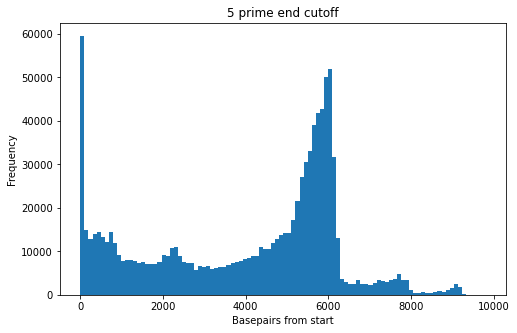

In [4]:
#LINE1
#======================

family = 'L1'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]

fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repStart'].values.astype(int), minus['repLeft'].values.astype(int))
plt.hist(vals,bins = 100)
#plt.xscale('log')
plt.ylabel('Frequency')
plt.xlabel('Basepairs from start')
plt.title('5 prime end cutoff')
plt.show()

In [5]:
family = 'L1'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
xvals = np.append(plus['repStart'].values.astype(int), minus['repLeft'].values.astype(int))
yvals = np.append(plus['repEnd'].values.astype(int) - plus['repStart'].values.astype(int),
                  minus['repEnd'].values.astype(int) - minus['repLeft'].values.astype(int))


/tmp/ipykernel_2024035/3438926317.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/3438926317.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


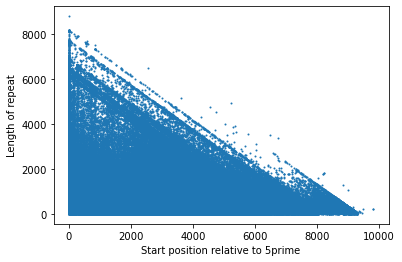

In [6]:
plt.scatter(xvals, yvals, s=1)
plt.xlabel('Start position relative to 5prime')
plt.ylabel('Length of repeat')
plt.show()

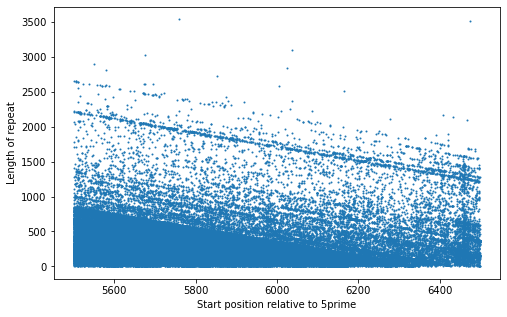

In [222]:
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(xvals[np.where((xvals > 5500) & (xvals < 6500))], yvals[np.where((xvals > 5500) & (xvals < 6500)) ], s=1)
plt.xlabel('Start position relative to 5prime')
plt.ylabel('Length of repeat')
plt.show()

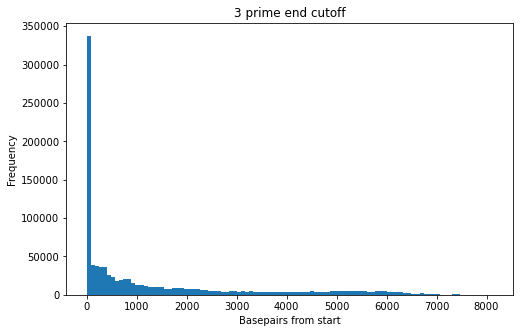

In [193]:
fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repLeft'].values, minus['repStart'].values)
plt.hist(vals,bins = 100)
#plt.xscale('log')
plt.ylabel('Frequency')
plt.xlabel('Basepairs overhanging')
plt.title('3 prime end cutoff')
plt.show()

In [54]:
#L1
#promoter position in 5' end - 110bp
#3' cut off -> none

cutoff = 110
family = 'L1'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
plus_5p = plus[plus['repStart'] < cutoff]
minus_5p = minus[minus['repLeft'] < cutoff]

/tmp/ipykernel_2024035/3709895602.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/3709895602.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


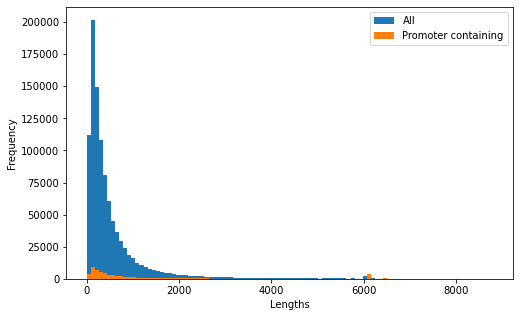

In [55]:
#Check lengths of filtered
family = 'L1'
fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['length'],minus['length'])
filt_vals = np.append(plus_5p['length'], minus_5p['length'])

plt.hist(vals,bins = 100, label = 'All')
plt.hist(filt_vals,bins = 100, label = 'Promoter containing')

#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Lengths')
plt.legend()
plt.show()

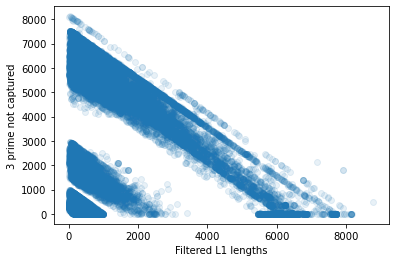

In [52]:
plt.scatter(plus_5p['length'], plus_5p['repLeft'], alpha = 0.1)
plt.xlabel('Filtered L1 lengths')
plt.ylabel('3 prime not captured')
plt.show()

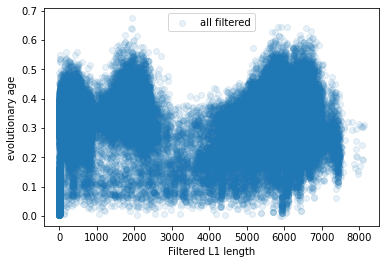

In [62]:
plt.scatter(plus_5p['repLeft'],plus_5p['age'],  alpha = 0.1, label = 'all filtered')
#plt.scatter(plus_filt[plus_filt['length']<2000]['length'],plus_filt[plus_filt['length']<2000]['age'], alpha = 0.1, label = 'shortest filtered')
plt.xlabel('Filtered L1 length')
plt.ylabel('evolutionary age')
plt.legend()
plt.show()


In [223]:
family = 'L1'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
xvals = np.append(plus['repLeft'].values, minus['repStart'].values)
yvals = np.append(plus['repEnd'].values.astype(int) - plus['repStart'].values.astype(int),
                  minus['repEnd'].values.astype(int) - minus['repLeft'].values.astype(int))


/tmp/ipykernel_1837581/1215033253.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_1837581/1215033253.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


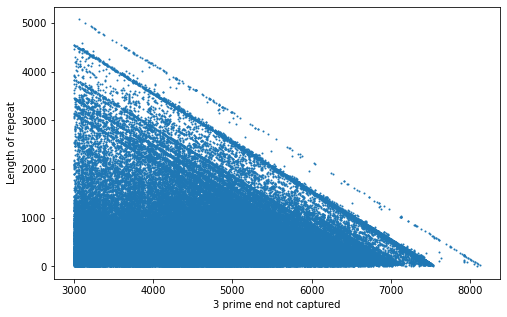

In [227]:
fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(xvals[np.where(xvals > 3000)], yvals[np.where(xvals > 3000)], s=1)
plt.xlabel('3 prime end not captured')
plt.ylabel('Length of repeat')
plt.show()

In [46]:
cutoff

70

In [75]:
#L1
#promoter position in 5' end - 110bp
#Remove truncated - less than 5500bp in length

promoter_cutoff = 110
length_cutoff = 5000
family = 'L1'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
plus_5p = plus[plus['repStart'] < promoter_cutoff]
minus_5p = minus[minus['repLeft'] < promoter_cutoff]
plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]

#SANITY CHECK
assert sum(plus_filt ["length"] > length_cutoff) == len(plus_filt ["length"]), 'Lengths are wrong'
assert sum(plus_filt ["repStart"] < promoter_cutoff) == len(plus_filt ["repStart"]), 'Promoter portions are too short'
assert sum(minus_filt ["length"] > length_cutoff) == len(minus_filt ["length"]), 'Lengths are wrong'
assert sum(minus_filt ["repLeft"] < promoter_cutoff) == len(minus_filt ["repLeft"]), 'Promoter portionis are too short'


/tmp/ipykernel_2024035/2850299689.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/2850299689.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]
/tmp/ipykernel_2024035/2850299689.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
/tmp/ipykernel_2024035/2850299689.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]


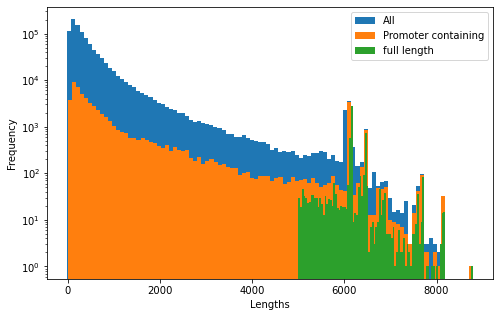

In [76]:
#Check lengths of filtered

fig,ax = plt.subplots(figsize = (8,5))
filt_vals = np.append(plus_filt['length'], minus_filt['length'])
prom_vals = np.append(plus_5p['length'], minus_5p['length'])
vals = np.append(plus['length'],minus['length'])


plt.hist(vals,bins = 100, label = 'All')
plt.hist(prom_vals,bins = 100, label = 'Promoter containing')
plt.hist(filt_vals,bins = 100, label = 'full length')

plt.yscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Lengths')
plt.show()

/tmp/ipykernel_2024035/1763267817.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/1763267817.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


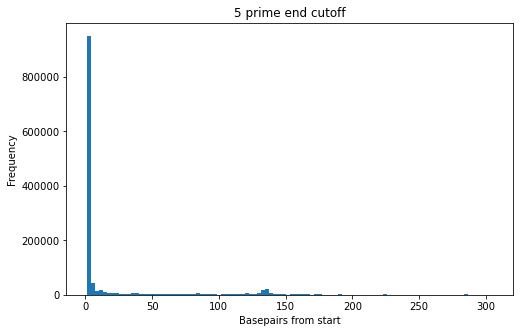

In [44]:
#ALU
#======================
family = 'Alu'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]

fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repStart'].values.astype(int), minus['repLeft'].values.astype(int))
plt.hist(vals,bins = 100)
#plt.xscale('log')

plt.ylabel('Frequency')
plt.xlabel('Basepairs from start')
plt.title('5 prime end cutoff')
plt.show()

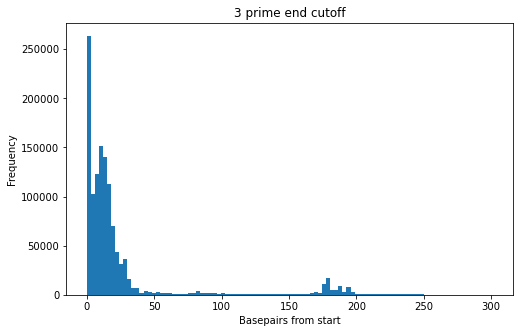

In [64]:
fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repLeft'].values, minus['repStart'].values)
plt.hist(vals,bins = 100)
#plt.xscale('log')
plt.ylabel('Frequency')
plt.xlabel('Basepairs from start')
plt.title('3 prime end cutoff')
plt.show()

In [77]:
#Alu
#promoter position in 5' end - 70bp

promoter_cutoff = 70
length_cutoff = 250

family = 'Alu'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
plus_5p = plus[plus['repStart'] < promoter_cutoff]
minus_5p = minus[minus['repLeft'] < promoter_cutoff]
plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]

#SANITY CHECK
assert sum(plus_filt ["length"] > length_cutoff) == len(plus_filt ["length"]), 'Lengths are wrong'
assert sum(plus_filt ["repStart"] < promoter_cutoff) == len(plus_filt ["repStart"]), 'Promoter portionis are too short'
assert sum(minus_filt ["length"] > length_cutoff) == len(minus_filt ["length"]), 'Lengths are wrong'
assert sum(minus_filt ["repLeft"] < promoter_cutoff) == len(minus_filt ["repLeft"]), 'Promoter portionis are too short'

/tmp/ipykernel_2024035/40760894.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/40760894.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]
/tmp/ipykernel_2024035/40760894.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
/tmp/ipykernel_2024035/40760894.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]


In [70]:
len(vals), len(filt_vals)

(1238995, 1096047)

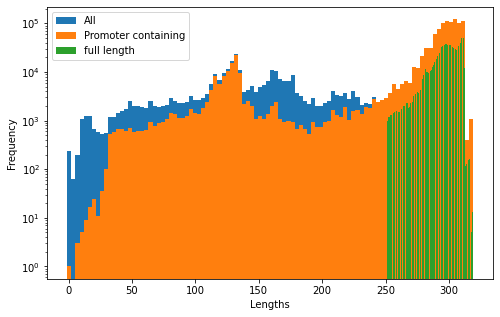

In [78]:
#Check lengths of filtered

fig,ax = plt.subplots(figsize = (8,5))
filt_vals = np.append(plus_filt['length'], minus_filt['length'])
prom_vals = np.append(plus_5p['length'], minus_5p['length'])
vals = np.append(plus['length'],minus['length'])

plt.hist(vals,bins = 100, label = 'All')
plt.hist(prom_vals,bins = 100, label = 'Promoter containing')
plt.hist(filt_vals,bins = 100, label = 'full length')

plt.yscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Lengths')
plt.show()

/tmp/ipykernel_2024035/2439105852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/2439105852.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]


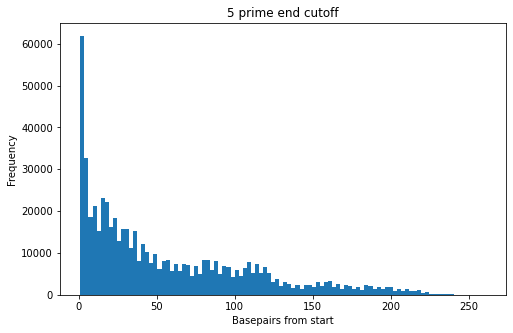

In [79]:
family = 'MIR'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]

fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repStart'].values.astype(int), minus['repLeft'].values.astype(int))
plt.hist(vals,bins = 100)
#plt.xscale('log')
plt.ylabel('Frequency')
plt.xlabel('Basepairs from start')
plt.title('5 prime end cutoff')
plt.show()

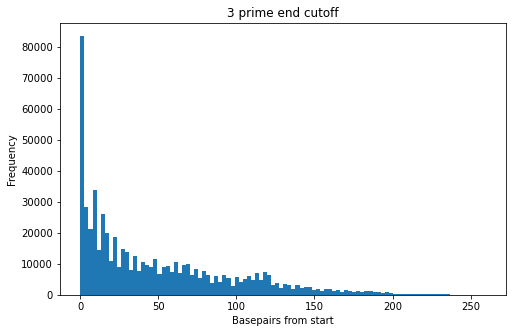

In [199]:
fig,ax = plt.subplots(figsize = (8,5))
vals = np.append(plus['repLeft'].values, minus['repStart'].values)
plt.hist(vals,bins = 100)
#plt.xscale('log')
plt.ylabel('Frequency')
plt.xlabel('Basepairs from start')
plt.title('3 prime end cutoff')
plt.show()

In [82]:
#MIR
#promoter position in 5' end -> 70bp
#3' cut off -> none

promoter_cutoff = 70
length_cutoff = 200
family = 'MIR'
plus = df[df['strand'] == '+'] [df['repFamily']==family]
minus = df[df['strand'] == '-'] [df['repFamily']==family]
plus_5p = plus[plus['repStart'] < promoter_cutoff]
minus_5p = minus[minus['repLeft'] < promoter_cutoff]
plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]

#SANITY CHECK
assert sum(plus_filt ["length"] > length_cutoff) == len(plus_filt ["length"]), 'Lengths are wrong'
assert sum(plus_filt ["repStart"] < promoter_cutoff) == len(plus_filt ["repStart"]), 'Promoter portionis are too short'
assert sum(minus_filt ["length"] > length_cutoff) == len(minus_filt ["length"]), 'Lengths are wrong'
assert sum(minus_filt ["repLeft"] < promoter_cutoff) == len(minus_filt ["repLeft"]), 'Promoter portionis are too short'


/tmp/ipykernel_2024035/471726474.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus = df[df['strand'] == '+'] [df['repFamily']==family]
/tmp/ipykernel_2024035/471726474.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus = df[df['strand'] == '-'] [df['repFamily']==family]
/tmp/ipykernel_2024035/471726474.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plus_filt = plus[plus['repStart'] < promoter_cutoff][plus['length'] > length_cutoff]
/tmp/ipykernel_2024035/471726474.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minus_filt = minus[minus['repLeft'] < promoter_cutoff] [minus['length'] > length_cutoff]


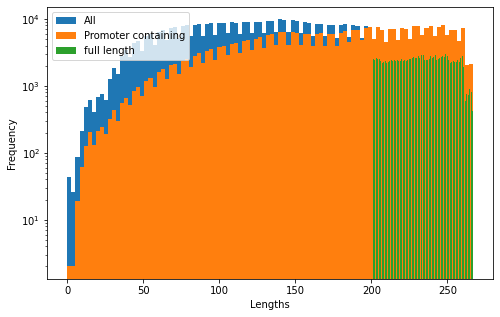

In [83]:
#Check lengths of filtered

fig,ax = plt.subplots(figsize = (8,5))
filt_vals = np.append(plus_filt['length'], minus_filt['length'])
prom_vals = np.append(plus_5p['length'], minus_5p['length'])
vals = np.append(plus['length'],minus['length'])

plt.hist(vals,bins = 100, label = 'All')
plt.hist(prom_vals,bins = 100, label = 'Promoter containing')
plt.hist(filt_vals,bins = 100, label = 'full length')

plt.yscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Lengths')
plt.show()

In [111]:
#FILTER FOR LINEs
line = rmsk[rmsk['class_id'] == 'LINE']
print('Line families = ' + str(line['family_id'].unique()))
print('Here we only look at L1 and L2 families')
l1 = line[line['family_id']=='L1']
l2 = line[line['family_id']=='L2']
print('Total L1 insertions in reference n = ' + str(len(l1)))
print('Total L2 insertions in reference n = ' + str(len(l2)))

#Remove truncated insertions by length
l1_co = 5500  #define minimum length for l1 insertions
l2_co = 2500 #define minimum length for l2 insertions

l1_full = l1[l1['End']-l1['Start'] > l1_co]
l2_full = l2[l2['End']-l2['Start'] > l2_co]

assert np.max(l1_full['End']-l1_full['Start']) > l1_co,  'L1 elements not correctly filtered'
assert np.max(l2_full['End']-l2_full['Start']) > l2_co,  'L2 elements not correctly filtered'
print ('Retained L1 insertions = ' + str(len(l1_full)) + ' ,  Truncated L1 insertions removed = ' + str(len(l1)-len(l1_full)))
print ('Retained L2 insertions = ' + str(len(l2_full)) + ' ,  Truncated L2 insertions removed = ' + str(len(l2)-len(l2_full))) 

Line families = ['L1' 'L2' 'CR1' 'RTE-Bo.B' 'RTE-X' 'Penelope' 'Dong-R4' 'RTE-BovB']
Here we only look at L1 and L2 families
Total L1 insertions in reference n = 1001410
Total L2 insertions in reference n = 474561
Retained L1 insertions = 8991 ,  Truncated L1 insertions removed = 992419
Retained L2 insertions = 46 ,  Truncated L2 insertions removed = 474515


In [122]:
#FILTER FOR SINEs
sine = rmsk[rmsk['class_id'] == 'SINE']
print('Sine families = ' + str(sine['family_id'].unique()))
print('Here we only look at Alu and MIR families')
alu = sine[sine['family_id']=='Alu']
mir = sine[sine['family_id']=='MIR']
print('Total Alu insertions in reference n = ' + str(len(alu)))
print('Total MIR insertions in reference n = ' + str(len(mir)))

#Remove truncated insertions by length
alu_co = 250  #define minimum length for alu insertions
mir_co = 250 #define minimum length for mir insertions

alu_full = alu[alu['End']-alu['Start'] > alu_co]
mir_full = mir[mir['End']-mir['Start'] > mir_co]

assert np.max(alu_full['End']-alu_full['Start']) > alu_co,  'Alu elements not corectly filtered'
assert np.max(mir_full['End']-mir_full['Start']) > mir_co,  'Mir elements not corectly filtered'
print ('Retained Alu insertions = ' + str(len(alu_full)) + ' ,  Truncated Alu insertions removed = ' + str(len(alu)-len(alu_full)))
print ('Retained Mir insertions = ' + str(len(mir_full)) + ' ,  Truncated Mir insertions removed = ' + str(len(mir)-len(mir_full)))

Sine families = ['Alu' 'MIR' '5S-Deu-L2']
Here we only look at Alu and MIR families
Total Alu insertions in reference n = 1238897
Total MIR insertions in reference n = 602609
Retained Alu insertions = 929241 ,  Truncated Alu insertions removed = 309656
Retained Mir insertions = 11456 ,  Truncated Mir insertions removed = 591153


In [6]:
# Convert into BED file
te_df = pd.concat([l1_full, l2_full, alu_full, mir_full]) #concatenate all TEs

# Only include 5' end of TE insertions for alignment 
n_start = 20 #Define the number of bps from the start of insertion to keep
te_bed = te_df.drop(['Source', 'Feature', 'Score', 'Frame'], axis=1) #re-order and remove some columns
te_bed = te_bed[['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']]


#split up the +/- strands in bed file
bed_plus = te_bed[te_bed["Strand"] == '+']
bed_plus['End'] = bed_plus['Start'] + n_start 

bed_minus = te_bed[te_bed["Strand"] == '-']
bed_minus['Start'] = bed_minus['End'] - n_start 

assert len(bed_plus) + len(bed_minus) == len(te_bed), 'Some insertions not assigned to +/- strands'
assert sum(bed_plus["Strand"] == "+") == len(bed_plus), 'Some non plus strands assigned to plus bed'
assert sum(bed_minus["Strand"] == "-") == len(bed_minus), 'Some non minus strands assigned to minus bed'

# # Write to bed file
bed_plus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed', sep='\t', index=False, header=False)
bed_minus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed', sep='\t', index=False, header=False)


/tmp/ipykernel_26953/4214644342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_plus['End'] = bed_plus['Start'] + n_start
/tmp/ipykernel_26953/4214644342.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bed_minus['Start'] = bed_minus['End'] - n_start


### Filter BAM file to retain 5'ss aligned reads

In [ ]:
#CALCULATE NUMBER OF READS IN ENTIRE FILE
samtools view Aligned.sortedByCoord.out.bam | wc -l > total_reads.txt

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Split bam into forward and reverse strands - total time = 40 minutes (20m per strand)
#forward strand + 
samtools view -h -F 0x10 Aligned.sortedByCoord.out.bam > plus.bam

#reverse strand - 
samtools view -h -f 0x10 Aligned.sortedByCoord.out.bam > minus.bam

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
# Filter bam with bed file - total time = 20 minutes (10 minutes per strand)
#plus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed plus.bam > plus.5pfilt.bam
samtools index plus.5pfilt.bam

#minus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed minus.bam > minus.5pfilt.bam
samtools index minus.5pfilt.bam


In [ ]:
# Obtain UMI,flag, chromosome number and start positions
samtools view plus.5pfilt.bam  | cut -f -9 > plus.5pfilt.UMI.txt
samtools view minus.5pfilt.bam  | cut -f -9 > minus.5pfilt.UMI.txt


In [2]:
import pandas as pd
#BEWARY OF NAMING - PLUS AND MINUS!
#Read in required files for filtering
bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed', sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed',sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']

bam_pl = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/minus.5pfilt.bam', as_df=True) #CHANGE
#Swap Start + End for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']

#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'


In [4]:
#Define + and - strand files
pl_pars = [bed_pl, bam_pl, '/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/plus.5pfilt.UMI.txt', 'plus']
mi_pars = [bed_mi, bam_mi, '/cndd3/dburrows/DATA/te/rna/filt.prac/CZI/minus.5pfilt.UMI.txt', 'minus']
par_list = [pl_pars, mi_pars]


In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
count_df = pd.DataFrame() #empty count matrix
bam_ll = [[],[]] #empty list of lists to store curr_bam indices

# Filter out reads that do not overlap with 5' portion of insertion
for x,par in enumerate(par_list):
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
    curr_bam['UMI']=curr_name[0].values #CHANGE CHANGE CHANGE 

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df, bam_ll[x] = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ll[x])

#Add in CPMs as a column
total_reads = pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/total_reads.txt', sep=" ", header=None)[0].values[0]
count_df['CPM'] = count_df['Count'].values / total_reads * 1000000

Aligning to chromosome chr1 for plus strand
Aligning to chromosome chr10 for plus strand
Aligning to chromosome chr11 for plus strand
Aligning to chromosome chr12 for plus strand
Aligning to chromosome chr13 for plus strand
Aligning to chromosome chr14 for plus strand
Aligning to chromosome chr15 for plus strand
Aligning to chromosome chr16 for plus strand
Aligning to chromosome chr17 for plus strand
Aligning to chromosome chr18 for plus strand
Aligning to chromosome chr19 for plus strand
Aligning to chromosome chr2 for plus strand
Aligning to chromosome chr20 for plus strand
Aligning to chromosome chr21 for plus strand
Aligning to chromosome chr22 for plus strand
Aligning to chromosome chr3 for plus strand
Aligning to chromosome chr4 for plus strand
Aligning to chromosome chr5 for plus strand
Aligning to chromosome chr6 for plus strand
Aligning to chromosome chr7 for plus strand
Aligning to chromosome chr8 for plus strand
Aligning to chromosome chr9 for plus strand
Aligning to chromos

In [9]:
count_df.groupby(['Strand', 'family_id']).sum()

Start           End   Count       CPM
Strand family_id                                              
+      Alu        135860349232  135860386832  1798.0  6.926222
       L1           1734818870    1734819230    17.0  0.065487
       L2            604322794     604323074    14.0  0.053931
       MIR          4871626039    4871627059    51.0  0.196461
-      Alu        137977540742  137977578942  1833.0  7.061048
       L1           2324199583    2324199963    19.0  0.073191
       MIR          2573171295    2573171935    32.0  0.123270

In [7]:
#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
# Obtain start positions
#Make txt file of start sites to remove
pl_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_pl)) , bam_ll[0].astype(int))]
mi_umi=pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.UMI.txt', sep='\t', header=None).iloc[np.setxor1d(np.arange(0,len(bam_mi)) , bam_ll[1].astype(int))]

#CHANGE CHANGE -> MAKE SURE NAMING CONVENTIONS ARE CORRECT
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt-notin.UMI.txt',  pl_umi, fmt='%s')
np.savetxt('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt-notin.UMI.txt',  mi_umi, fmt='%s')


In [ ]:
#Filter bam file
#CHECK FILE NAMES

#PLUS
samtools view -h plus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' plus.5pfilt-notin.UMI.txt -> plus.5pfilt-tss.sam
samtools view -S -b plus.5pfilt-tss.sam > plus.5pfilt-tss.bam

#MINUS
samtools view -h minus.5pfilt.bam | awk 'NR==FNR{a[$1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9];next} !($1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$6"\t"$7"\t"$8"\t"$9 in a)' minus.5pfilt-notin.UMI.txt -> minus.5pfilt-tss.sam
samtools view -S -b minus.5pfilt-tss.sam > minus.5pfilt-tss.bam
samtools merge -f 5pfilt-tss.bam plus.5pfilt-tss.bam minus.5pfilt-tss.bam 
samtools index 5pfilt-tss.bam


In [8]:
def check(check_bool, check_bam, sign):
    bam_ = np.char.add((check_bam[check_bam['Strand'] == sign]['Start'].values).astype(str),  (check_bam[check_bam['Strand'] == sign]['Chromosome'].values).astype(str))
    bool_ = np.char.add(check_bool['Start'].values.astype(str), check_bool['Chromosome'].values.astype(str) )
    assert sum(np.in1d(bam_, bool_)) == len(bam_), 'Merged BAM file is missing some strand reads'
    assert sum(np.in1d(bool_, bam_)) == len(bool_), 'Merged BAM file is missing some strand reads'


In [9]:
#Final assertion
out_bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/5pfilt-tss.bam', as_df=True) 
assert len(out_bam[out_bam['Strand'] == '+']) == len(bam_ll[0]), 'Merged BAM file is missing some plus strand reads'
assert len(out_bam[out_bam['Strand'] == '-']) == len(bam_ll[1]), 'Merged BAM file is missing some minus strand reads'
#swap start and end back for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']
check(bam_pl.iloc[bam_ll[0]],out_bam, '+')
check(bam_mi.iloc[bam_ll[1]],out_bam, '-')
print('All reads accounted for')

All reads accounted for


# ATEM Filtering statistics

In [102]:
###### WHICH TES ARE REMOVED FROM REFERENCE
og = pr.read_gtf('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf', as_df=True)
og_line = og[og['class_id'] == 'LINE']
og_sine = og[og['class_id'] == 'SINE']


In [75]:
og

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
0,chr1,hg38_rmsk,exon,100000000,100000637,11325,-,.,L1M2,L1M2_dup229,L1,LINE
1,chr1,hg38_rmsk,exon,10000001,10000239,1760,+,.,AluSx3,AluSx3_dup157,Alu,SINE
2,chr1,hg38_rmsk,exon,100000743,100002612,11325,-,.,L1M2,L1M2_dup230,L1,LINE
3,chr1,hg38_rmsk,exon,10000250,10000566,2225,+,.,AluSx,AluSx_dup700,Alu,SINE
4,chr1,hg38_rmsk,exon,100002612,100002913,1799,-,.,AluJr,AluJr_dup3513,Alu,SINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4693506,chrY,hg38_rmsk,exon,9998087,9998438,1154,-,.,MLT1B,MLT1B_dup11187,ERVL-MaLR,LTR
4693507,chrY,hg38_rmsk,exon,9999718,9999778,228,-,.,MIR3,MIR3_dup51650,MIR,SINE
4693508,KI270740.1,hg38_rmsk,exon,228,540,2240,-,.,AluY,AluY_dup110742,Alu,SINE
4693509,KI270740.1,hg38_rmsk,exon,624,867,1433,-,.,L1PA7,L1PA7_dup13354,L1,LINE


In [92]:
og_line['End'] - og_line['Start']

0          -637
2         -1869
5          -220
7          -861
9          -137
           ... 
4693485    -118
4693486    -263
4693490    -101
4693500    -401
4693509    -243
Length: 1570523, dtype: int64

In [106]:
filt_line

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id
11,GL000008.2,97412,97432,-,L1PA3_dup11068,L1PA3,L1,LINE
58,GL000009.2,183952,183972,-,L1PA4_dup12241,L1PA4,L1,LINE
85,GL000194.1,174553,174573,-,L1PA4_dup12245,L1PA4,L1,LINE
125,GL000208.1,35882,35902,-,L1PA2_dup5088,L1PA2,L1,LINE
126,GL000208.1,63441,63461,-,L1PA2_dup5089,L1PA2,L1,LINE
...,...,...,...,...,...,...,...,...
949439,chrY,24553556,24553576,+,L1PA5_dup7532,L1PA5,L1,LINE
949459,chrY,24776006,24776026,+,L1PA2_dup3384,L1PA2,L1,LINE
949510,chrY,25369702,25369722,+,L1PA2_dup3387,L1PA2,L1,LINE
949565,chrY,25891554,25891574,+,L1PA5_dup7539,L1PA5,L1,LINE


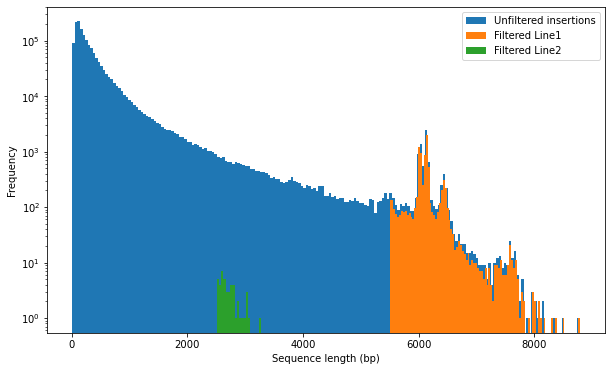

In [120]:
fig, ax = plt.subplots(figsize = (10,6))
plt.hist(og_line['End'] - og_line['Start'], bins = 200, label = 'Unfiltered insertions')
plt.hist(l1_full['End'] - l1_full['Start'], bins = 100, label = 'Filtered Line1')
plt.hist(l2_full['End'] - l2_full['Start'], bins = 20, label = 'Filtered Line2')

plt.yscale('log')
plt.xlabel('Sequence length (bp)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

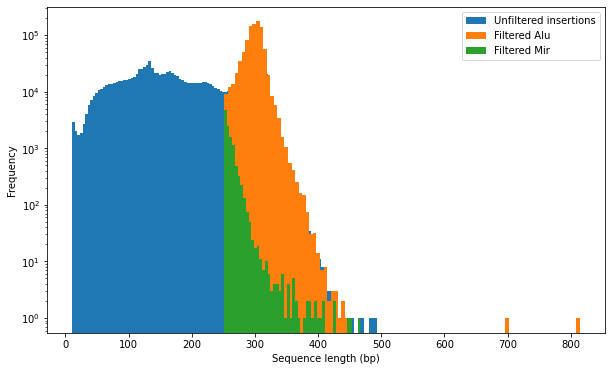

In [125]:
fig, ax = plt.subplots(figsize = (10,6))
plt.hist(og_sine['End'] - og_sine['Start'], bins = 200, label = 'Unfiltered insertions')
plt.hist(alu_full['End'] - alu_full['Start'], bins = 100, label = 'Filtered Alu')
plt.hist(mir_full['End'] - mir_full['Start'], bins = 50, label = 'Filtered Mir')

plt.yscale('log')
plt.xlabel('Sequence length (bp)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [134]:
df = pd.concat([alu_full.groupby('gene_id').count()['class_id'], og_sine.groupby('gene_id').count()['class_id']])
df

gene_id
AluJb        87387
AluJo        42803
AluJr        50549
AluJr4       11645
AluSc        31788
             ...  
MIR         176635
MIR1_Amn     11832
MIR3         87384
MIRb        225106
MIRc        101652
Name: class_id, Length: 105, dtype: int64

In [130]:
og_sine.groupby('gene_id').count()

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,transcript_id,family_id,class_id
gene_id,,,,,,,,,,,
Alu,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658
AluJb,131759,131759,131759,131759,131759,131759,131759,131759,131759,131759,131759
AluJo,81375,81375,81375,81375,81375,81375,81375,81375,81375,81375,81375
AluJr,88503,88503,88503,88503,88503,88503,88503,88503,88503,88503,88503
AluJr4,20966,20966,20966,20966,20966,20966,20966,20966,20966,20966,20966
AluSc,36338,36338,36338,36338,36338,36338,36338,36338,36338,36338,36338
AluSc5,7018,7018,7018,7018,7018,7018,7018,7018,7018,7018,7018
AluSc8,23028,23028,23028,23028,23028,23028,23028,23028,23028,23028,23028
AluSg,38681,38681,38681,38681,38681,38681,38681,38681,38681,38681,38681


In [70]:
filt

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id
0,GL000008.2,14556,14576,-,AluSc_dup36296,AluSc,Alu,SINE
1,GL000008.2,20915,20935,-,AluSz6_dup49864,AluSz6,Alu,SINE
2,GL000008.2,64328,64348,-,AluSz_dup107596,AluSz,Alu,SINE
3,GL000008.2,64629,64649,-,AluSz6_dup49865,AluSz6,Alu,SINE
4,GL000008.2,65179,65199,-,AluJo_dup81269,AluJo,Alu,SINE
...,...,...,...,...,...,...,...,...
949729,chrY,57200711,57200731,+,AluSg7_dup4792,AluSg7,Alu,SINE
949730,chrY,57201487,57201507,+,AluSp_dup27787,AluSp,Alu,SINE
949731,chrY,57202264,57202284,+,AluSz_dup56215,AluSz,Alu,SINE
949732,chrY,57202568,57202588,+,AluSc_dup20104,AluSc,Alu,SINE


# ATEM benchmarking

In [ ]:
###### TEST ON POSITIVE CONTROL DATA


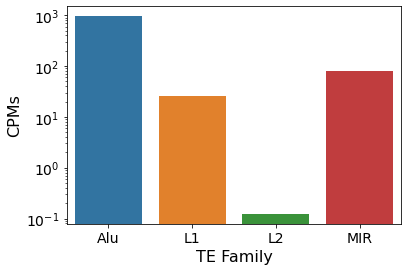

In [35]:
import seaborn as sns
sns.barplot(data=count_df.groupby(['family_id']).sum(), x=count_df.groupby(['family_id']).sum().index, y="CPM")
#increase size of labels
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('CPMs', fontsize=16)
#make yaxis log scale
plt.yscale('log')
plt.show()

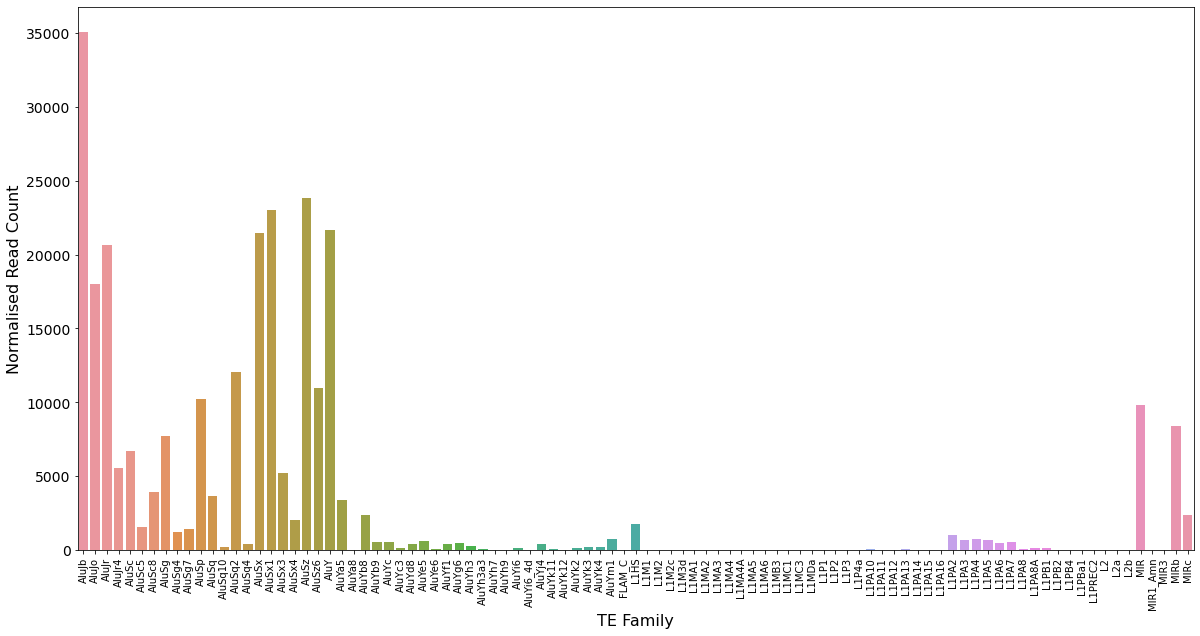

In [7]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=count_df.groupby(['gene_id']).sum(), x=count_df.groupby(['gene_id']).sum().index, y="Count")
#increase size of labels
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('Normalised Read Count', fontsize=16)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [187]:
#Subset LINEs - order by evolutionary age
line = count_df[count_df['class_id'] == 'LINE']
line

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count,CPM
50991,chr1,172314246,172314266,+,L1PA3_dup529,L1PA3,L1,LINE,1.0,0.003852
46458,chr1,149293675,149293695,+,L1PA5_dup419,L1PA5,L1,LINE,1.0,0.003852
62303,chr1,243807047,243807067,+,L1PA5_dup728,L1PA5,L1,LINE,1.0,0.003852
45078,chr1,118852351,118852371,+,L1HS_dup62,L1HS,L1,LINE,1.0,0.003852
63269,chr1,248761641,248761661,+,L1PA3_dup759,L1PA3,L1,LINE,1.0,0.003852
...,...,...,...,...,...,...,...,...,...,...
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852
489957,chrY,5612179,5612199,-,L1HS_dup1111,L1HS,L1,LINE,1.0,0.003852


In [207]:
#Load in evol age csv
evol_age = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/evolutionary_age.csv', sep=',', header=0)
evol_age

,family,element,age
0,LINE,L1PA3,0.036821
1,LINE,L1PA5,0.058144
2,LINE,L1HS,0.020472
3,LINE,L1PA6,0.075453
4,LINE,L1PA7,0.084113
...,...,...,...
90,SINE,AluYk12,0.078529
91,SINE,FLAM_C,0.185532
92,SINE,MIR1_Amn,0.358442
93,SINE,AluYh7,0.125251


In [309]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

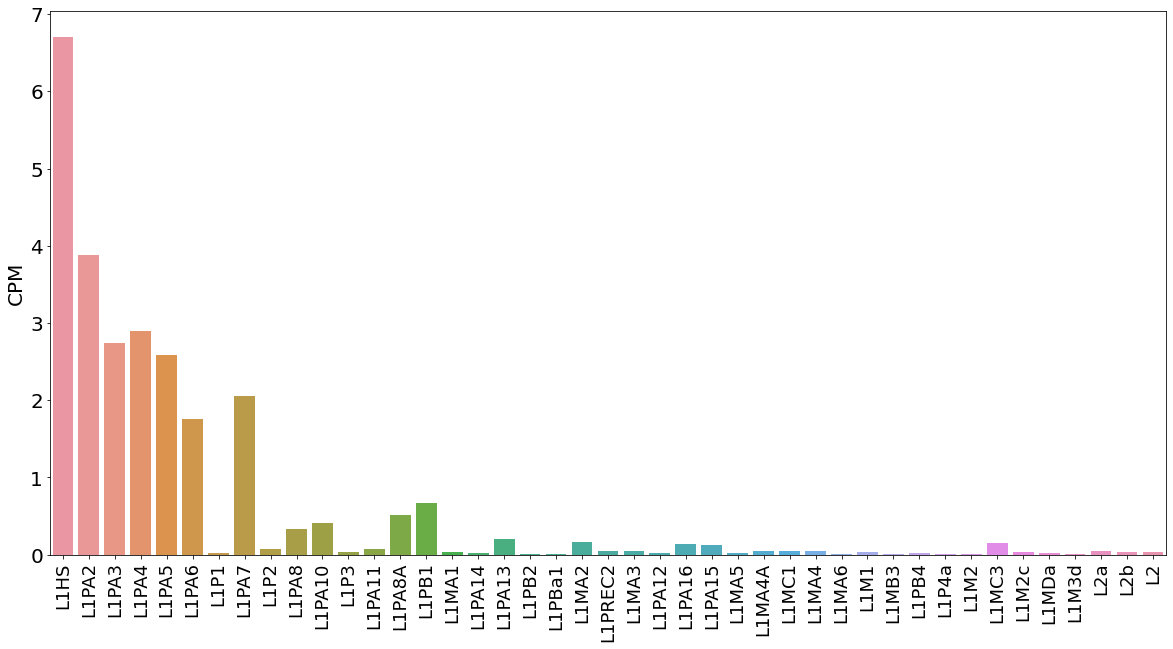

In [311]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=line.groupby(['gene_id']).sum(), x=line.groupby(['gene_id']).sum().index, y="CPM", order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=20)
#remove xlabel
plt.xlabel('')
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [240]:
def counts_vs_age(sum_df, evol_df):
    counts,age = [],[]
    for l in sum_df.index:
        counts.append(sum_df.loc[l]['CPM'])
        age.append(evol_df[evol_df['element'] == l]['age'].values[0])
    return(counts,age)


In [312]:
sum_df = line.groupby(['gene_id']).sum()
counts, age = counts_vs_age(sum_df, evol_age)

In [313]:
#do pearsons correlation on age vs counts
from scipy.stats import pearsonr
corr, _ = pearsonr(age, counts)
print('Pearsons correlation: %.3f' % corr)
print(_)

Pearsons correlation: -0.540
0.00018311983681745277


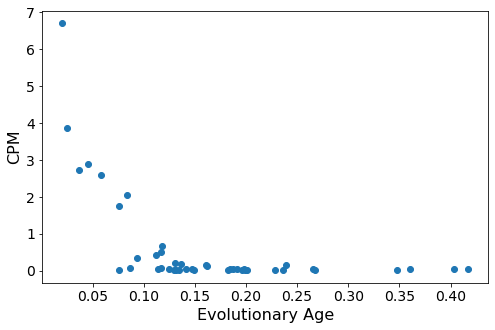

In [328]:
from scipy.stats import linregress

fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(age, counts)
# line_fit=linregress(age, counts)
# xseq = np.linspace(0, 0.4, num=10)
# plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)

plt.xlabel('Evolutionary Age', fontsize=16)
plt.ylabel('CPM', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

In [329]:
#Subset SINEs - order by evolutionary age
sine = count_df[count_df['class_id'] == 'SINE']
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'SINE']['age'].values, evol_age[evol_age['family'] == 'SINE']['element'].values)

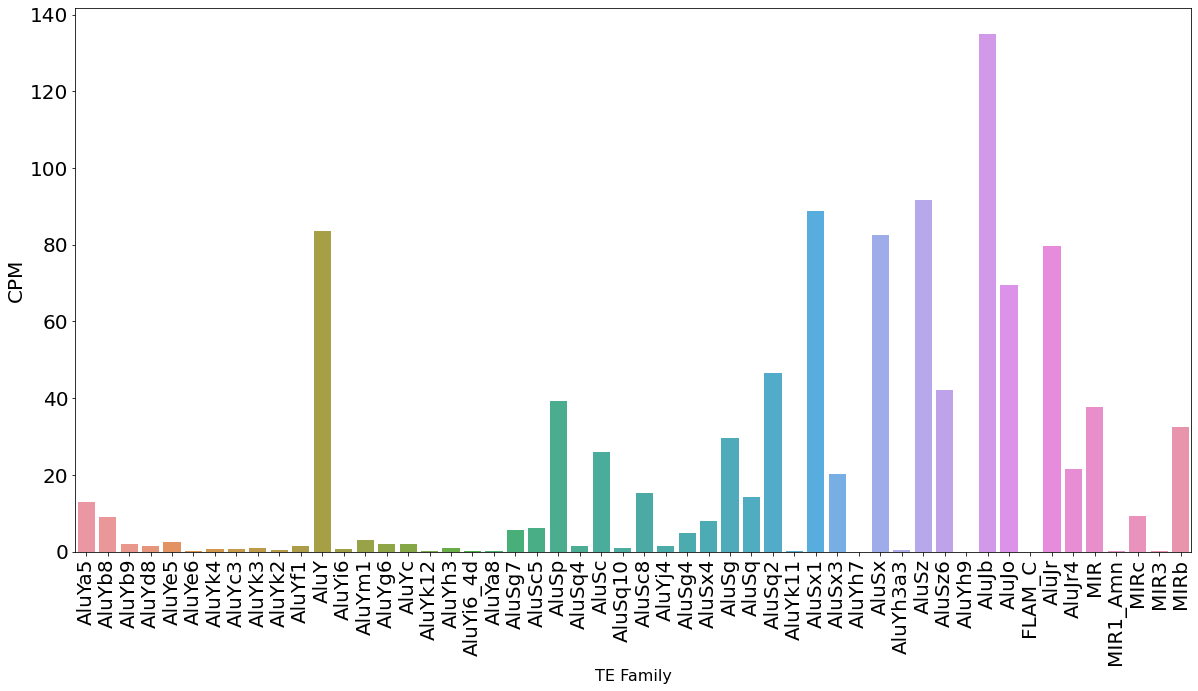

In [331]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=sine.groupby(['gene_id']).sum(), x=sine.groupby(['gene_id']).sum().index, y="CPM", order=sort_name)
#increase size of labels
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('TE Family', fontsize=16)
plt.ylabel('CPM', fontsize=20)
#make yaxis log scale
#plt.yscale('log')
plt.show()

In [332]:
sum_df = sine.groupby(['gene_id']).sum()
counts, age = counts_vs_age(sum_df, evol_age)

In [333]:
#do pearsons correlation on age vs counts
from scipy.stats import pearsonr
corr, _ = pearsonr(age, counts)
print('Pearsons correlation: %.3f' % corr)
print(_)

Pearsons correlation: 0.182
0.19731264874412457


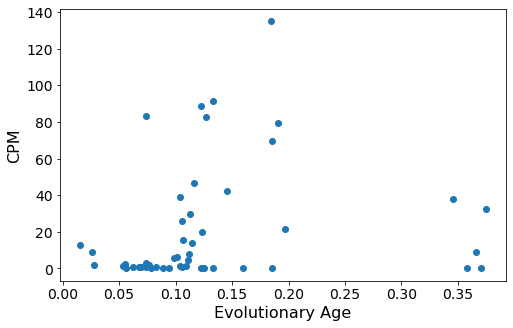

In [334]:
from scipy.stats import linregress

fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(age, counts)
# line_fit=linregress(age, counts)
# xseq = np.linspace(0, 0.4, num=10)
# plt.plot(xseq, line_fit.intercept + line_fit.slope*xseq, 'r',)

plt.xlabel('Evolutionary Age', fontsize=16)
plt.ylabel('CPM', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.show()

In [254]:
#Compare with TET
#Load TE transcripts output
#TET_counts = pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/TET.cntTable', sep="\t", header=0)
TET_counts


,gene/TE,./Aligned.sortedByCoord.out.bam
0,ENSG00000000003.15,58
1,ENSG00000000005.6,8
2,ENSG00000000419.13,457
3,ENSG00000000457.14,827
4,ENSG00000000460.17,383
...,...,...
61827,Zaphod2:hAT-Tip100:DNA,2850
61828,Zaphod3:hAT-Tip100:DNA,5800
61829,Zaphod:hAT-Tip100:DNA,7564
61830,hAT-16_Crp:hAT-Charlie:DNA,191


In [335]:
l_unq = line['gene_id'].unique()
dict = {'element':[], 'counts':[], 'type':[]}
dict, l_unq

({'element': [], 'counts': [], 'type': []},
 array(['L1PA3', 'L1PA5', 'L1HS', 'L1PA6', 'L1PA7', 'L1PB1', 'L1PA4',
        'L1PA10', 'L1PA2', 'L1MA5', 'L1MA4', 'L1PA15', 'L1MA2', 'L1PA8',
        'L1PA13', 'L1PA16', 'L1MA4A', 'L1P3', 'L1PA11', 'L2', 'L1PA8A',
        'L1M2', 'L2a', 'L1P2', 'L1PA12', 'L1PREC2', 'L1MC3', 'L1P4a',
        'L1PA14', 'L1M3d', 'L1MA3', 'L2b', 'L1MA6', 'L1MA1', 'L1P1',
        'L1M2c', 'L1MC1', 'L1M1', 'L1MDa', 'L1PB4', 'L1PB2', 'L1PBa1',
        'L1MB3'], dtype=object))

In [336]:
for l in l_unq:
    dict['element'].append(l)
    dict['counts'].append(line[line['gene_id']==l]['Count'].sum())
    dict['type'].append('5p_filter')

In [337]:
for l in l_unq:
    dict['element'].append(l)
    dict['type'].append('TET')
    tet_count = TET_counts[[l in TET_counts['gene/TE'].values[i] for i in range(len(TET_counts['gene/TE'].values))]]['./Aligned.sortedByCoord.out.bam'].values[0]
    dict['counts'].append(tet_count)

In [338]:
df = pd.DataFrame(dict)
df

,element,counts,type
0,L1PA3,711.133333,5p_filter
1,L1PA5,670.000000,5p_filter
2,L1HS,1740.283333,5p_filter
3,L1PA6,455.000000,5p_filter
4,L1PA7,533.000000,5p_filter
...,...,...,...
81,L1MDa,102030.000000,TET
82,L1PB4,80144.000000,TET
83,L1PB2,30136.000000,TET
84,L1PBa1,11352.000000,TET


In [339]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

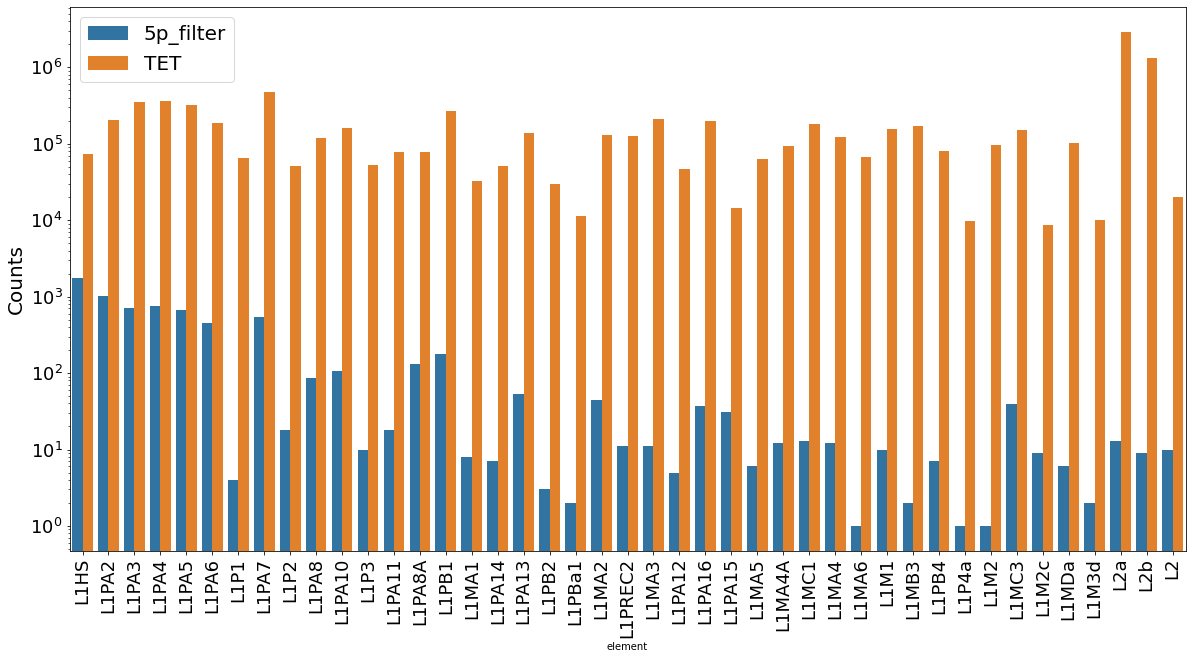

In [341]:
#Plot jointly on bar plot
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='element', y="counts", hue='type', order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel('Counts', fontsize=20)
plt.legend(fontsize=20)
#make log scaled y axies
plt.yscale('log')
plt.show()

In [342]:
s_unq = sine['gene_id'].unique()
dict = {'element':[], 'counts':[], 'type':[]}
dict, s_unq

({'element': [], 'counts': [], 'type': []},
 array(['AluJo', 'AluSx1', 'MIR', 'AluSz', 'AluSx3', 'AluY', 'AluJb',
        'AluJr4', 'AluYb8', 'AluSp', 'AluSx', 'AluYc3', 'AluSz6', 'AluSg7',
        'MIRb', 'AluSc', 'AluYi6', 'AluSc8', 'AluSg', 'AluSq2', 'AluYa5',
        'AluJr', 'AluSq', 'AluYm1', 'MIRc', 'AluYh3', 'AluSc5', 'AluYg6',
        'AluSx4', 'AluYe5', 'AluYb9', 'AluSg4', 'AluSq4', 'AluYk3',
        'AluYc', 'AluYk11', 'AluYd8', 'AluYj4', 'AluYk4', 'AluYe6',
        'AluYf1', 'AluYh3a3', 'MIR3', 'AluSq10', 'AluYk2', 'AluYa8',
        'AluYi6_4d', 'AluYk12', 'FLAM_C', 'MIR1_Amn', 'AluYh7', 'AluYh9'],
       dtype=object))

In [343]:
for l in s_unq:
    dict['element'].append(l)
    dict['counts'].append(sine[sine['gene_id']==l]['Count'].sum())
    dict['type'].append('5p_filter')
    
for l in s_unq:
    dict['element'].append(l)
    dict['type'].append('TET')
    tet_count = TET_counts[[l in TET_counts['gene/TE'].values[i] for i in range(len(TET_counts['gene/TE'].values))]]['./Aligned.sortedByCoord.out.bam'].values[0]
    dict['counts'].append(tet_count)

In [344]:
df = pd.DataFrame(dict)
df

,element,counts,type
0,AluJo,18036.585348,5p_filter
1,AluSx1,23034.683333,5p_filter
2,MIR,9808.000000,5p_filter
3,AluSz,23809.615476,5p_filter
4,AluSx3,5223.016667,5p_filter
...,...,...,...
99,AluYk12,673.000000,TET
100,FLAM_C,116100.000000,TET
101,MIR1_Amn,67775.000000,TET
102,AluYh7,340.000000,TET


In [345]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'SINE']['age'].values, evol_age[evol_age['family'] == 'SINE']['element'].values)

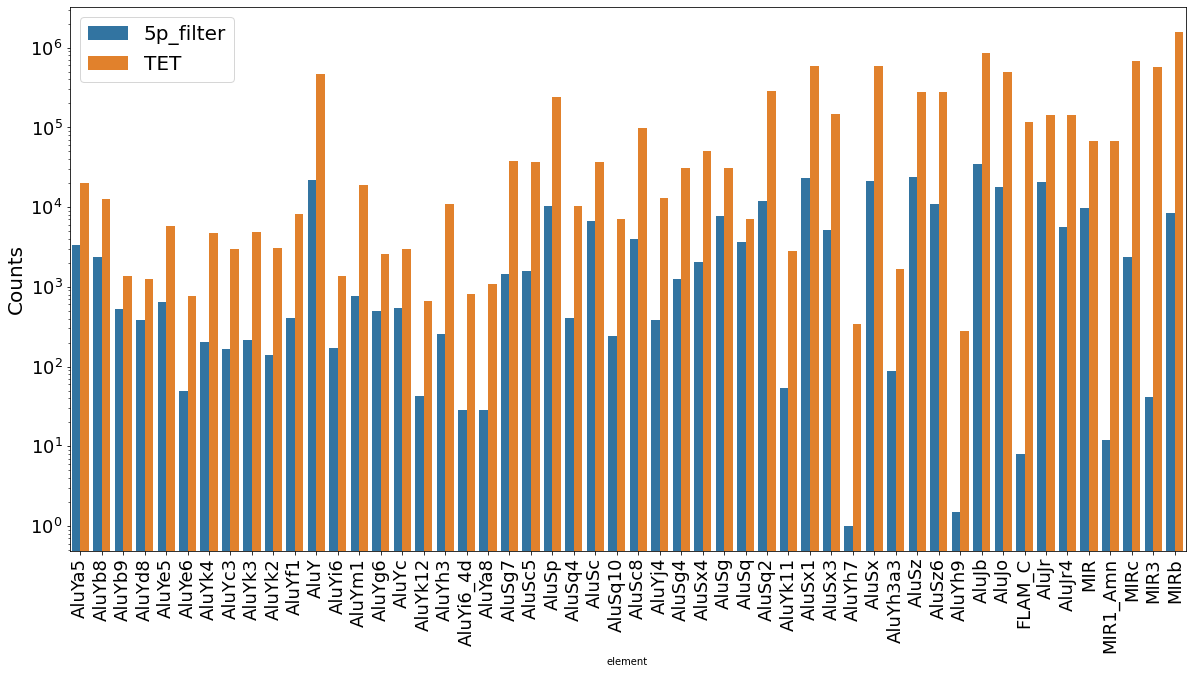

In [346]:
#Plot jointly on bar plot
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='element', y="counts", hue='type', order=sort_name)
#increase size of labels
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel('Counts', fontsize=20)
plt.legend(fontsize=20)
#make log scaled y axies
plt.yscale('log')
plt.show()

In [ ]:
sort_age, sort_name = adm.sort_2list(evol_age[evol_age['family'] == 'LINE']['age'].values, evol_age[evol_age['family'] == 'LINE']['element'].values)

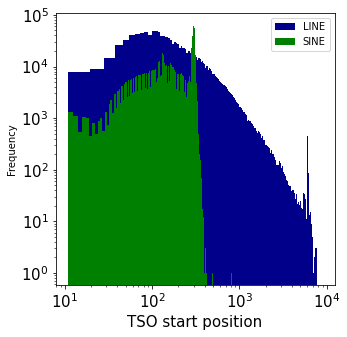

In [122]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(L_length, bins=1000, color='darkblue', label='LINE')
plt.hist(S_length, bins=500, color='green', label='SINE')

plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 10})
plt.xscale('log')
plt.yscale('log')
plt.savefig(s_fig + '/TE_lengths.svg', transparent=True)
plt.show()